In [26]:
#task1
#data preprocessing
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("/content/WineQT (1).csv")
print(df.isnull().sum())
print(df.describe())
print("wine quality:",df['quality'].unique())
features_np = df.drop(['quality','Id'],axis=1).values
target_np = df['quality'].values
print("features shapes",features_np.shape)
print("target shape",target_np.shape)

df = df.drop("Id", axis = 1)
x = df.drop("quality",axis = 1) # input  vairables
y = df["quality"] # target vairable
#train data is 80 percent and test data is 20 percent
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)
#standadize the data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1143.000000       1143.000000  1143.000000     1143.000000   
mean        8.311111          0.531339     0.268364        2.532152   
std         1.747595          0.179633     0.196686        1.355917   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.392500     0.090000        1.900000   
50%         7.900000          0.520000     0.250000        2.200000   
75%         9.100000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         

In [27]:
#task2
#model training
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report

#random forest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(x_train_scaled, y_train)
rf_predictions = rf_classifier.predict(x_test_scaled)
print("Random Forest Classifier:")
print(classification_report(y_test, rf_predictions))

#stochastic gradient descent
stochastic_gradient_descent = SGDClassifier(loss='hinge', penalty='l2', max_iter=1000, random_state=42)
stochastic_gradient_descent.fit(x_train_scaled, y_train)
stochastic_gradient_descent_predictions = stochastic_gradient_descent.predict(x_test_scaled)
print("\nStochastic Gradient Descent Classifier:")
print(classification_report(y_test, stochastic_gradient_descent_predictions))

#support vector classifier
svc = SVC(kernel='linear', random_state=42)
svc.fit(x_train_scaled, y_train)
svc_predictions = svc.predict(x_test_scaled)
print("\nSupport Vector Classifier:")
print(classification_report(y_test, svc_predictions))

Random Forest Classifier:
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.71      0.80      0.75        96
           6       0.68      0.66      0.67        99
           7       0.72      0.69      0.71        26
           8       0.00      0.00      0.00         2

    accuracy                           0.70       229
   macro avg       0.42      0.43      0.43       229
weighted avg       0.67      0.70      0.68       229


Stochastic Gradient Descent Classifier:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         6
           5       0.57      0.80      0.67        96
           6       0.53      0.24      0.33        99
           7       0.30      0.54      0.39        26
           8       0.00      0.00      0.00         2

    accuracy                           0.50       229
   macro a

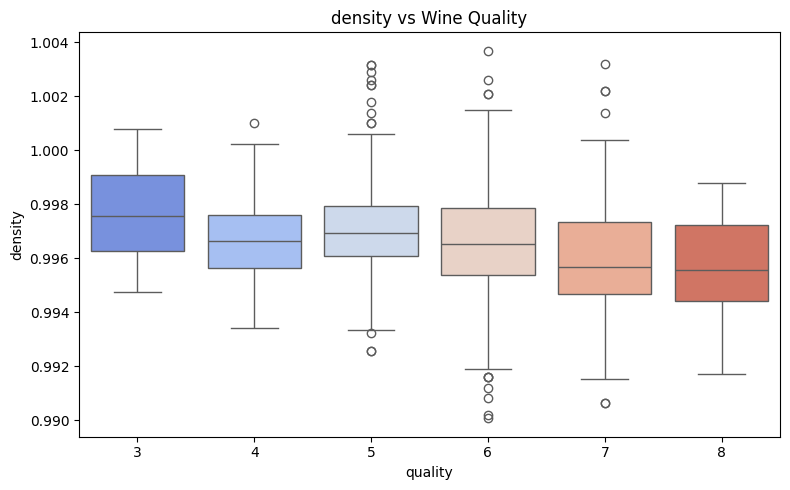

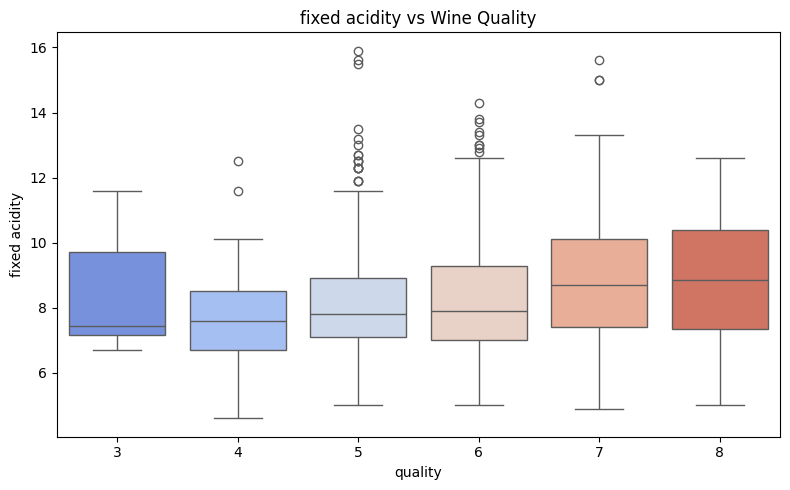

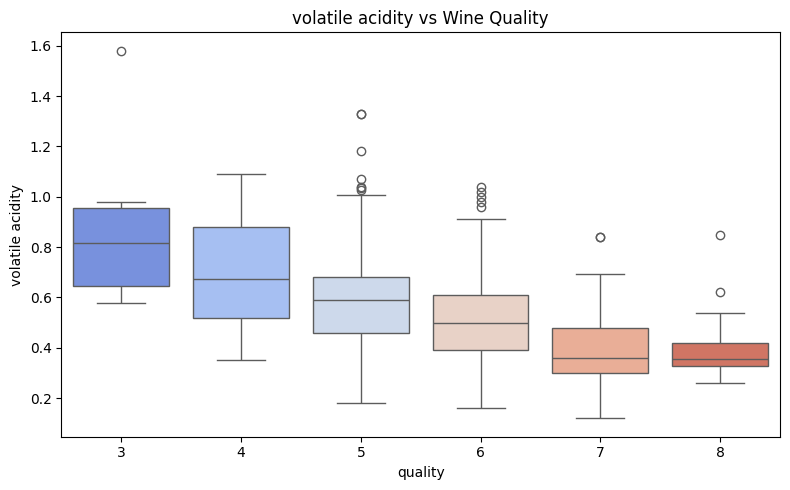

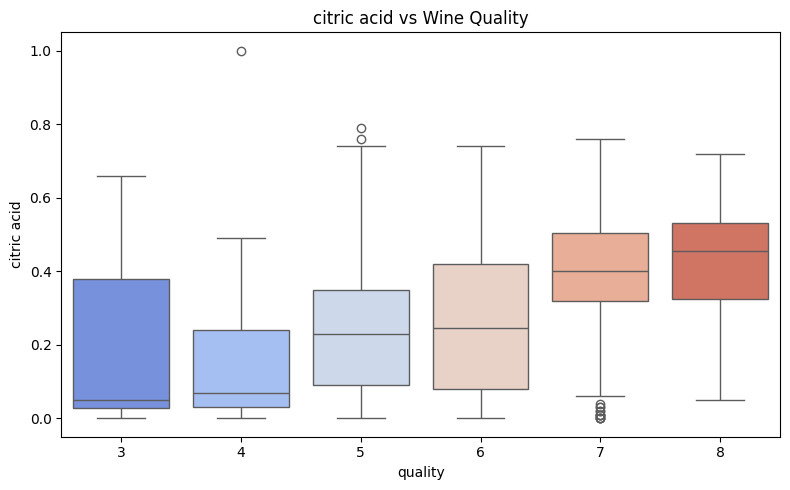

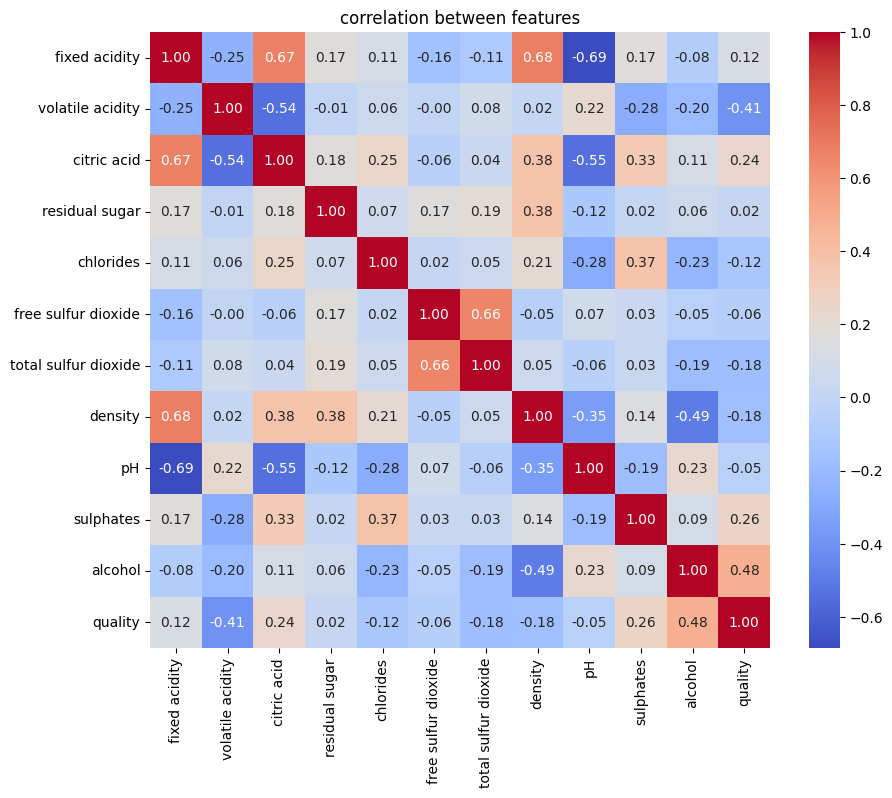

In [28]:
#task3
#chemical Qualities
import seaborn as sns
import matplotlib.pyplot as plt

chemical_features = ['density', 'fixed acidity','volatile acidity','citric acid']
for feature in chemical_features:
  plt.figure(figsize=(8,5))
  sns.boxplot(x='quality',y=feature,data=df,palette="coolwarm")
  plt.title(f'{feature} vs Wine Quality')
  plt.tight_layout()
  plt.show()
#correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot = True,cmap= "coolwarm",fmt= ".2f")
plt.title ("correlation between features")
plt.show()


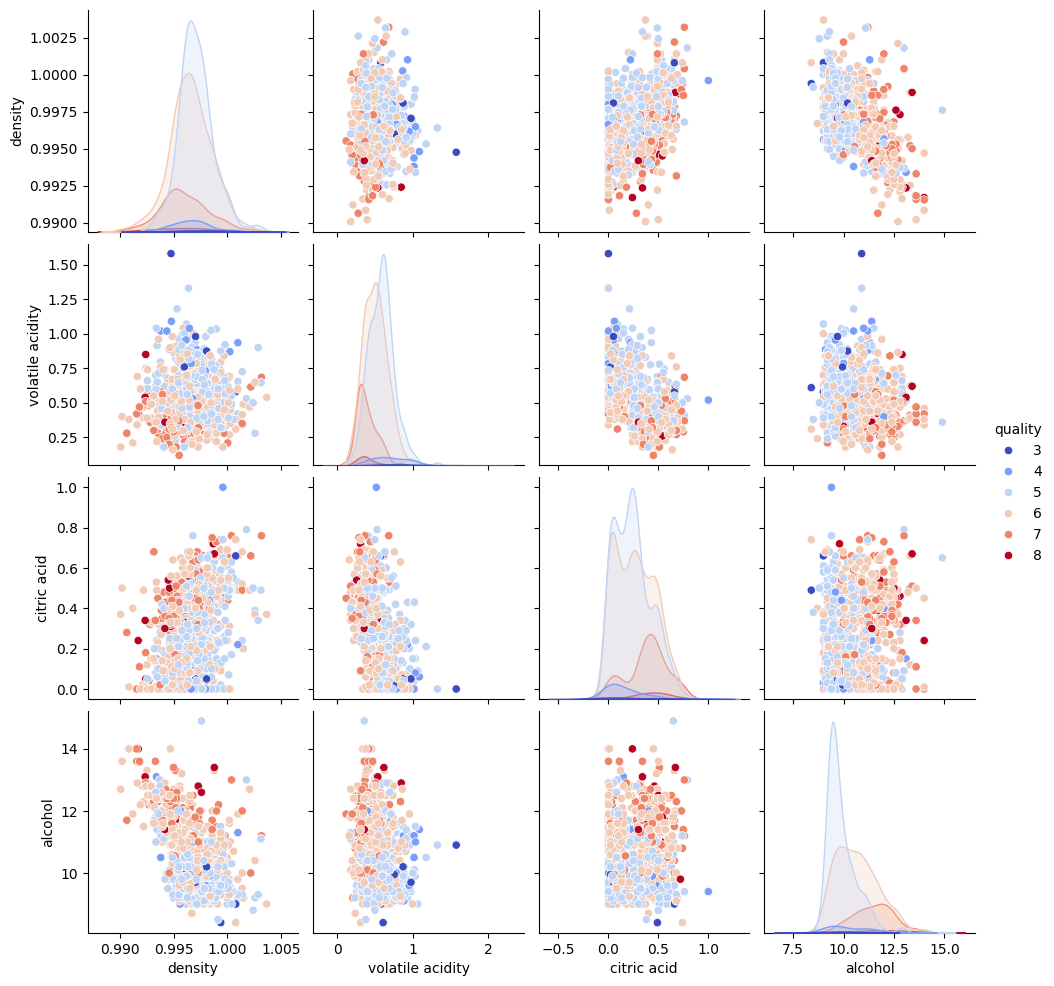

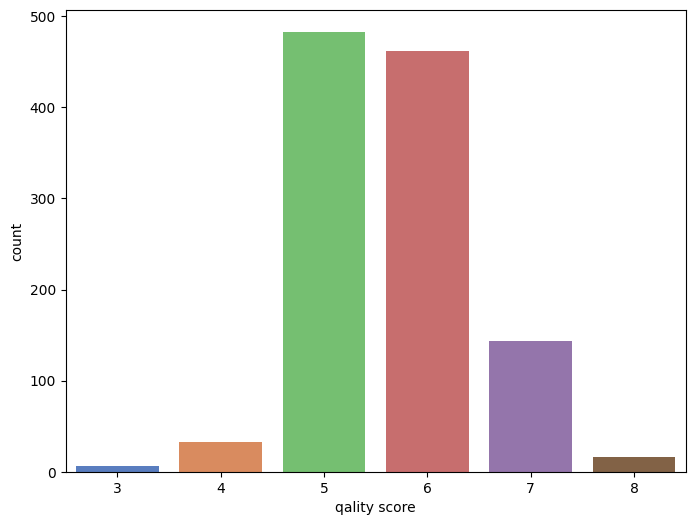

In [32]:
#task4
#data visualization
#selecting most relevant features based on correlation
subset = df[['density','volatile acidity', 'citric acid','alcohol', 'quality']]
sns.pairplot(subset,hue= "quality", palette = "coolwarm", diag_kind= 'kde')
plt.show()
#plot of wine quality
plt.figure(figsize=(8,6))
sns.countplot(x='quality',data=df,palette= "muted")
plt.title = ("wine quality")
plt.xlabel("qality score")
plt.show()